 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
whale_path = Path("./Resources/whale_returns.csv")
whale = pd.read_csv(whale_path, index_col="Date",parse_dates=True, infer_datetime_format=True)


In [3]:
# Count nulls
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale.dropna(inplace=True)
whale.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [5]:
whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_path = Path("./Resources/algo_returns.csv")
algo = pd.read_csv(algo_path, index_col="Date",parse_dates=True, infer_datetime_format=True)

In [7]:
# Count nulls
algo.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
# Drop nulls
algo.dropna(inplace=True)
algo.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sep_path = Path("./Resources/sp500_history.csv")
sep = pd.read_csv(sep_path, index_col="Date",parse_dates=True, infer_datetime_format=True)
sep.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
# Check Data Types
sep.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types
sep["Close"] = sep["Close"].str.replace("$","")
sep.dtypes

Close    object
dtype: object

In [12]:
sep["Close"] = sep["Close"].astype("float")
sep.dtypes

Close    float64
dtype: object

In [13]:
# Calculate Daily Returns
sep_daily_return = sep.pct_change()
sep_daily_return.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [14]:
# Drop nulls
sep_daily_return.dropna(inplace=True)
sep_daily_return.columns

Index(['Close'], dtype='object')

In [15]:
# Rename `Close` Column to be specific to this portfolio.
sep_daily_return.columns = ["S&P Returns"]
sep_daily_return.head()

,S&P Returns
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [16]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined = pd.concat([whale, algo, sep_daily_return], axis="columns", join="inner")
combined.sort_index(inplace=True)
combined.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

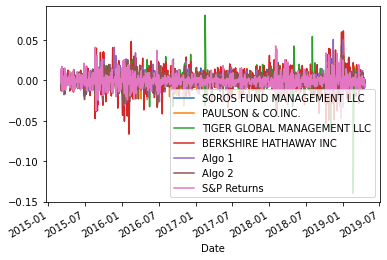

In [17]:
# Plot daily returns of all portfolios
combined.plot()

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

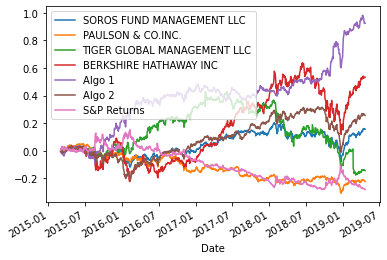

In [18]:
# Calculate cumulative returns of all portfolios
cumulative = (1 + combined).cumprod()-1
# Plot cumulative returns
cumulative.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

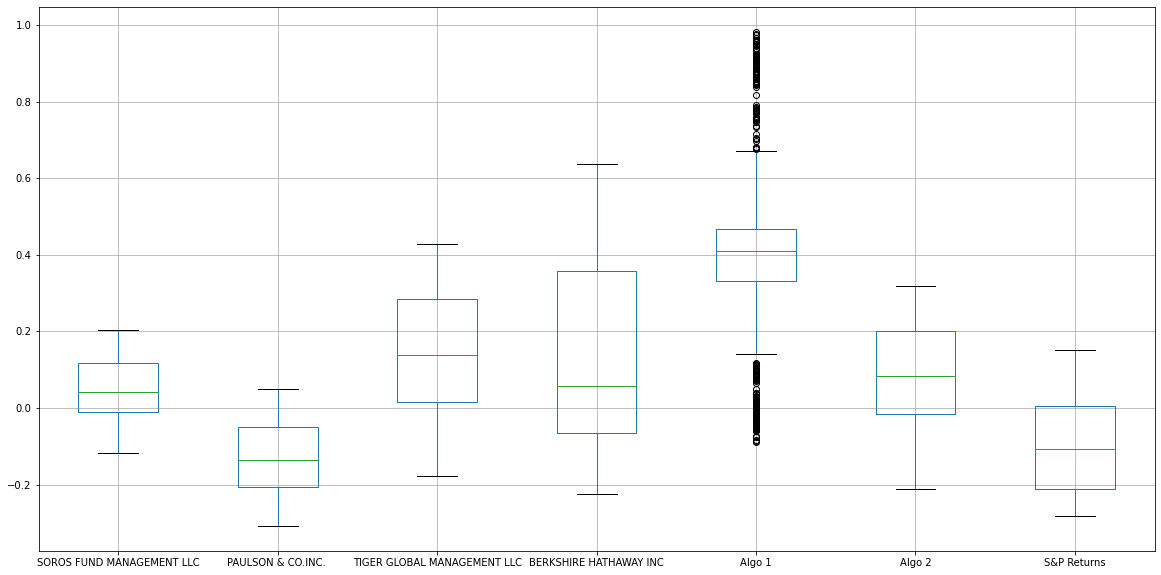

In [19]:
# Box plot to visually show risk
cumulative.boxplot(figsize=(20,10))

### Calculate Standard Deviations

In [65]:
# Calculate the daily standard deviations of all portfolios
combined_std = combined.std()
combined_std = combined_std.sort_values(ascending=False)
combined_std

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P Returns                    0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

### Determine which portfolios are riskier than the S&P 500

<AxesSubplot:ylabel='Frequency'>

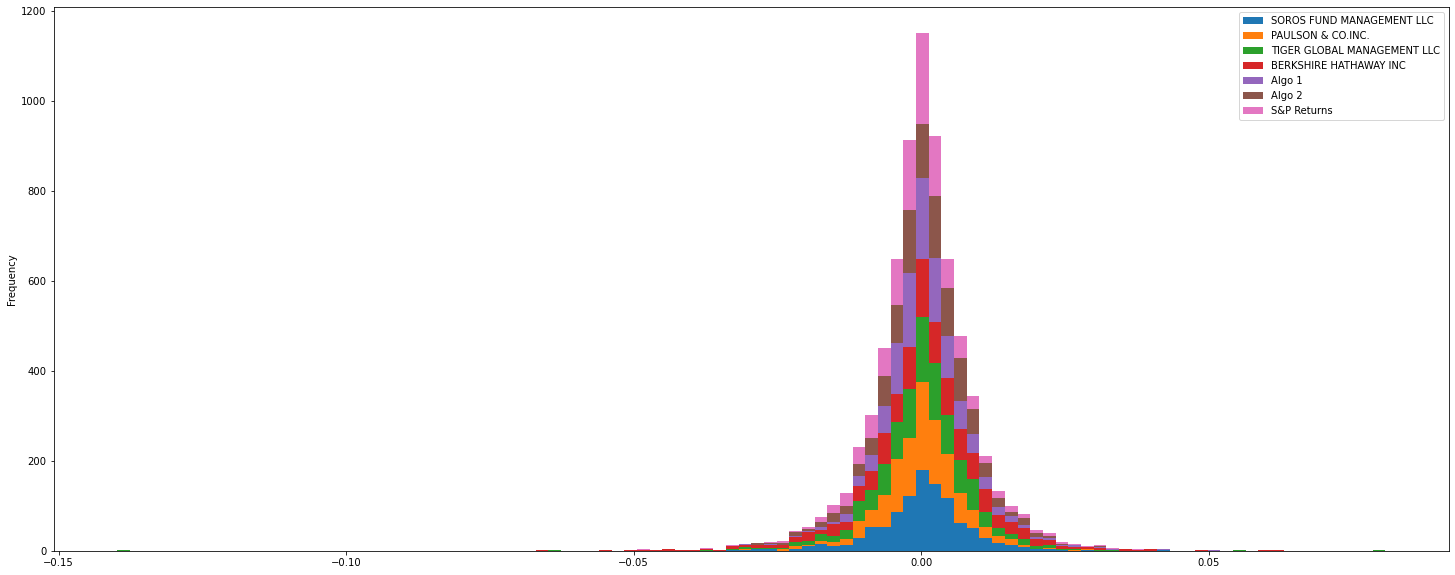

In [66]:
combined.plot.hist(stacked=True, bins=100, figsize=(25,10))

# Calculate  the daily standard deviation of S&P 500
    #shown above; 0.008587
# Determine which portfolios are riskier than the S&P 500
    #as per output above, only BERKSHIRE HATHAWAY INC 

### Calculate the Annualized Standard Deviation

In [68]:
# Calculate the annualized standard deviation (252 trading days)
annual_std = combined_std * np.sqrt(252)
annual_std

BERKSHIRE HATHAWAY INC         0.205079
TIGER GLOBAL MANAGEMENT LLC    0.172989
S&P Returns                    0.136313
Algo 2                         0.132413
SOROS FUND MANAGEMENT LLC      0.125348
Algo 1                         0.121006
PAULSON & CO.INC.              0.111527
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

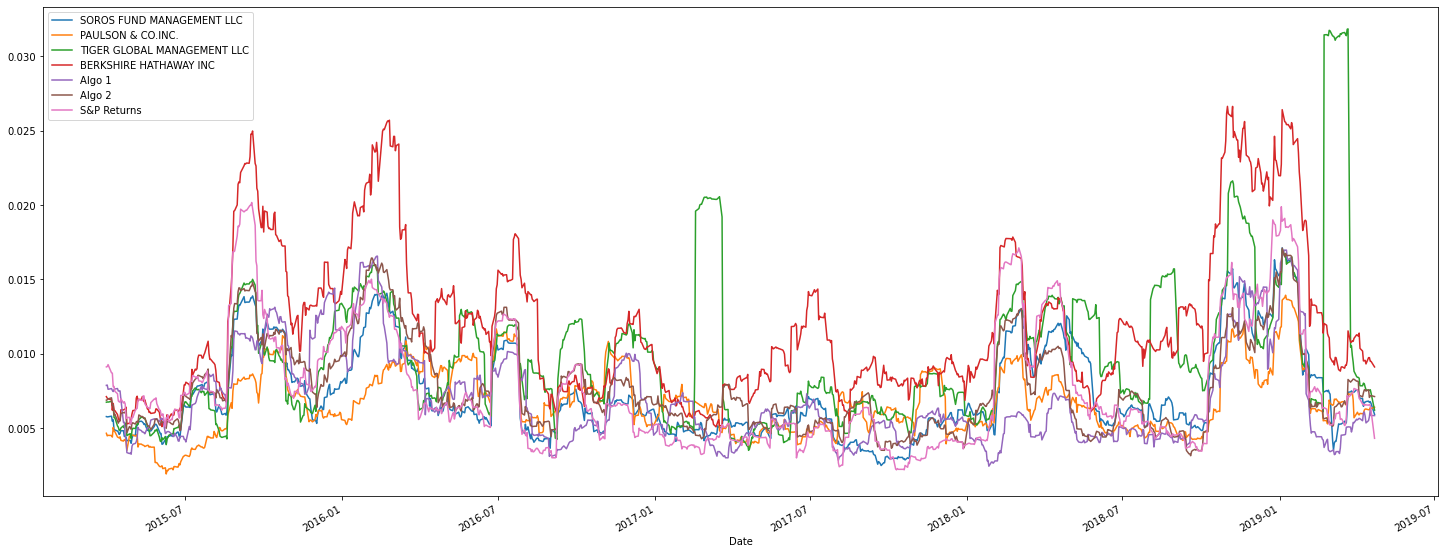

In [69]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined.rolling(window=21).std().plot(figsize=(25,10))
# Plot the rolling standard deviation


### Calculate and plot the correlation

In [24]:
# Calculate the correlation
correlation = combined.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Returns
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P Returns,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


<AxesSubplot:>

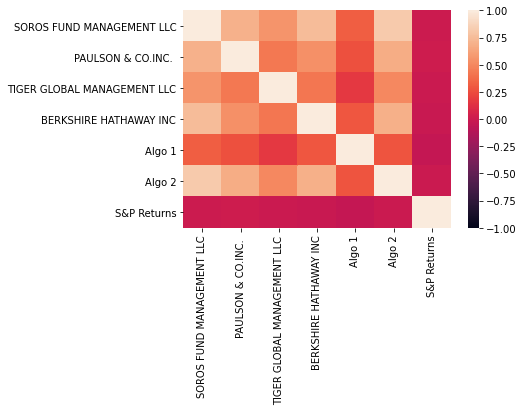

In [25]:
# Display de correlation matrix
sns.heatmap(correlation, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of BERSKSHIRE'}, xlabel='Date'>

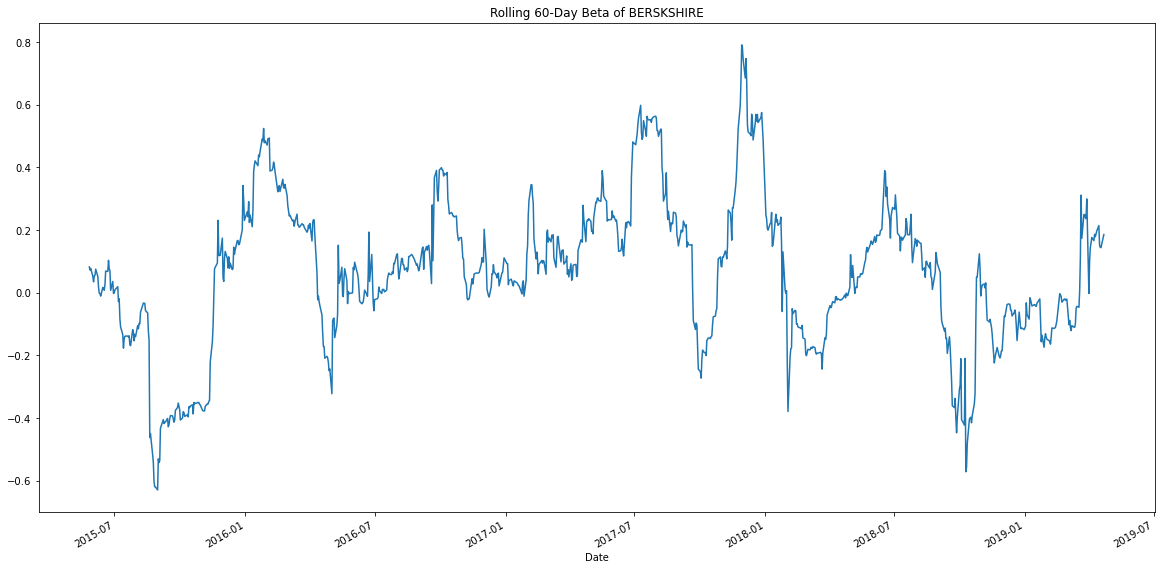

In [26]:
# Calculate covariance of a single portfolio
rolling_covariance_berkshire = combined["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(combined["S&P Returns"])

# Calculate variance of S&P 500
rolling_variance_sep = combined["S&P Returns"].rolling(window=60).var()

# Computing beta
rolling_beta = rolling_covariance_berkshire / rolling_variance_sep

# Plot beta trend
rolling_beta.plot(figsize=(20,10), title='Rolling 60-Day Beta of BERSKSHIRE')


## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [27]:
# Use `ewm` to calculate the rolling window
#rolling_beta.ewn(halflife='21 days')

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [28]:
cumulative

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,-0.010514,0.001464,0.003208
2015-03-05,0.004981,0.002314,-0.000681,0.004327,-0.011459,0.005794,0.017632
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,-0.016359,-0.005733,0.013634
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,-0.021717,-0.004437,0.031123
...,...,...,...,...,...,...,...
2019-04-15,0.157839,-0.213494,-0.137203,0.525584,0.958591,0.264103,-0.274944
2019-04-16,0.160965,-0.213189,-0.137920,0.526861,0.944990,0.267768,-0.273292
2019-04-17,0.157602,-0.218277,-0.141721,0.531781,0.924954,0.261140,-0.274438


In [29]:
# Annualized Sharpe Ratios1
sharpe = (combined.mean()*252) / (combined.std() * np.sqrt(252))
sharpe.sort_values(ascending=False)    

Algo 1                         1.369589
BERKSHIRE HATHAWAY INC         0.606743
Algo 2                         0.484334
SOROS FUND MANAGEMENT LLC      0.342894
TIGER GLOBAL MANAGEMENT LLC   -0.130186
PAULSON & CO.INC.             -0.491422
S&P Returns                   -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

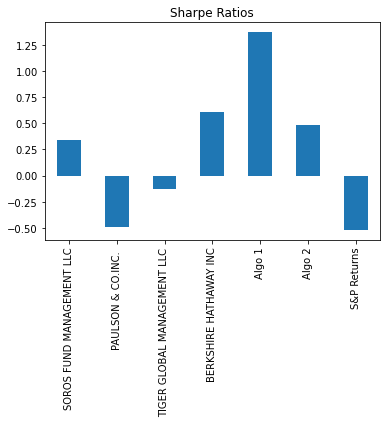

In [30]:
# Visualize the sharpe ratios as a bar plot
sharpe.plot.bar(title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

* Algo 1 outperforms market and all other portfolios by comfortable distance, with a sharpe ratio of 1.37
* Algo 2 outperforms market and other portfolios, except for BERKSHIRE. 

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [31]:
# Reading data from 1st stock
aapl_path = Path("./Resources/aapl.csv")
aapl = pd.read_csv(aapl_path, index_col="Date",parse_dates=True, infer_datetime_format=True)
aapl.columns = ["AAPL"]
aapl.head()


,AAPL
Date,
2015-01-02,"27,33"
2015-01-05,"26,56"
2015-01-06,"26,57"
2015-01-07,"26,94"
2015-01-08,"27,97"


In [32]:
# Reading data from 2nd stock
goog_path = Path("./Resources/goog.csv")
goog = pd.read_csv(goog_path, index_col="Date",parse_dates=True, infer_datetime_format=True)
goog.columns = ["GOOG"]
goog.head()

,GOOG
Date,
2015-01-02,"523,37"
2015-01-05,"512,46"
2015-01-06,"500,59"
2015-01-07,"499,73"
2015-01-08,"501,3"


In [33]:
# Reading data from 3rd stock
cost_path = Path("./Resources/cost.csv")
cost = pd.read_csv(cost_path, index_col="Date",parse_dates=True, infer_datetime_format=True)
cost.columns = ["COST"]
cost.head()

,COST
Date,
2015-01-02,"141,61"
2015-01-05,140
2015-01-06,"141,85"
2015-01-07,"144,32"
2015-01-08,"145,56"


In [34]:
# Combine all stocks in a single DataFrame
combined_2 = pd.concat([aapl, goog, cost], axis="columns", join="inner")
combined_2.sort_index(inplace=True)
combined_2.dtypes
combined_2.head()




,AAPL,GOOG,COST
Date,,,
2015-01-02,"27,33","523,37","141,61"
2015-01-05,"26,56","512,46",140
2015-01-06,"26,57","500,59","141,85"
2015-01-07,"26,94","499,73","144,32"
2015-01-08,"27,97","501,3","145,56"


In [35]:
#replace , for .
combined_2['AAPL'] = combined_2['AAPL'].str.replace(",",".")
combined_2['GOOG'] = combined_2['GOOG'].str.replace(",",".")
combined_2['COST'] = combined_2['COST'].str.replace(",",".")
combined_2.head()

,AAPL,GOOG,COST
Date,,,
2015-01-02,27.33,523.37,141.61
2015-01-05,26.56,512.46,140
2015-01-06,26.57,500.59,141.85
2015-01-07,26.94,499.73,144.32
2015-01-08,27.97,501.3,145.56


In [36]:
# Convert to float
combined_2[['AAPL', 'GOOG', 'COST']] = combined_2[['AAPL', 'GOOG', 'COST']].astype("float")

In [37]:
# Calculate daily returns
combined_2_ret = combined_2.pct_change()
# Drop NAs
combined_2_ret.dropna(inplace=True)
# Display sample datacombined_2_ret.head()
combined_2_ret.head()

,AAPL,GOOG,COST
Date,,,
2015-01-05,-0.028174,-0.020846,-0.011369
2015-01-06,0.000377,-0.023163,0.013214
2015-01-07,0.013925,-0.001718,0.017413
2015-01-08,0.038233,0.003142,0.008592
2015-01-09,0.001073,-0.012946,-0.015389


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [48]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
port_ret = combined_2_ret.dot(weights)
port_ret.head()
# Display sample data


Date
2015-01-05   -0.020130
2015-01-06   -0.003191
2015-01-07    0.009873
2015-01-08    0.016656
2015-01-09   -0.009088
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [59]:
# Join your returns DataFrame to the original returns DataFrame
combined_2 = pd.concat([combined,port_ret], axis="columns", join="inner")
combined_2.sort_index(inplace=True)
columns_2 = ['SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC. ','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC',
'Algo 1','Algo 2','S&P Returns',"Lucca's Portfolio"]
combined_2.columns = columns_2
combined_2.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Returns,Lucca's Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,0.000778
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.002671
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.004602
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.007500
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.004699


In [60]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_2.dropna(inplace=True)
combined_2.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P Returns,Lucca's Portfolio
Date,,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408,0.000778
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195,-0.002671
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378,0.004602
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929,-0.007500
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254,0.004699


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [70]:
# Calculate the annualized `std`
combined_std = combined_2.std()*np.sqrt(252)
combined_std.head()

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

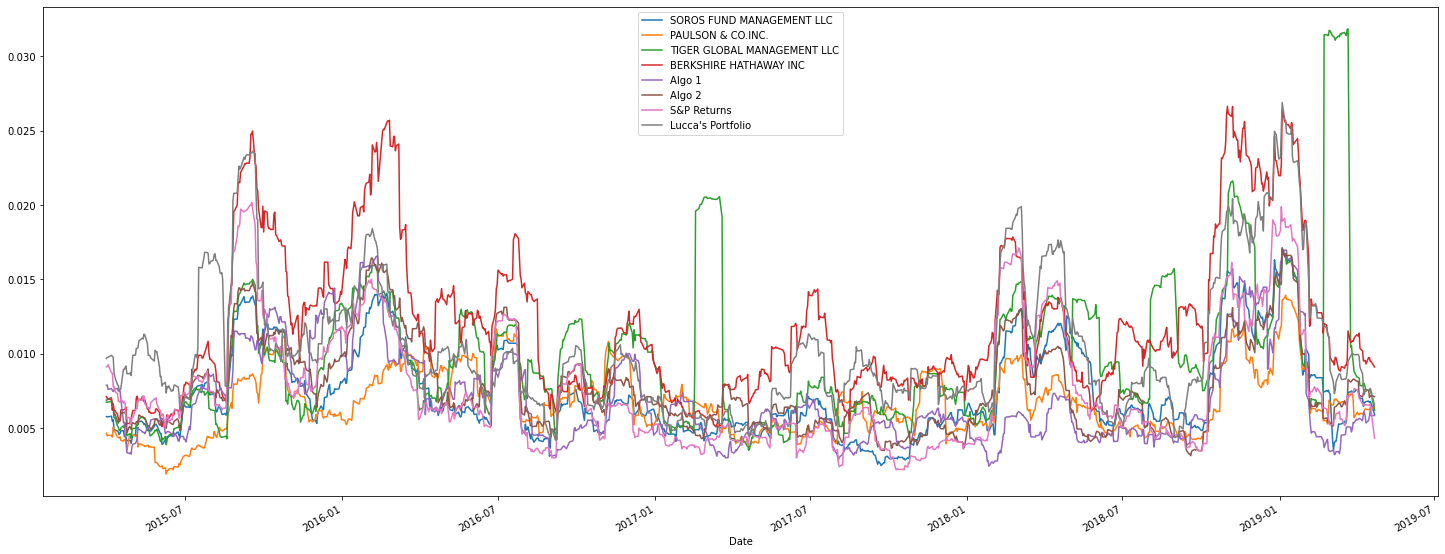

In [71]:
# Calculate rolling standard deviation
combined_2.rolling(window=21).std().plot(figsize=(25,10))

# Plot rolling standard deviation


### Calculate and plot the correlation

<AxesSubplot:>

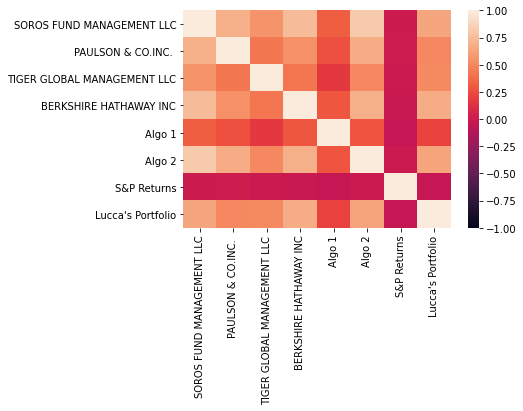

In [74]:
# Calculate and plot the correlation
correlation_2 = combined_2.corr()
sns.heatmap(correlation_2, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 6-day Beta of Lucca Portfolio'}, xlabel='Date'>

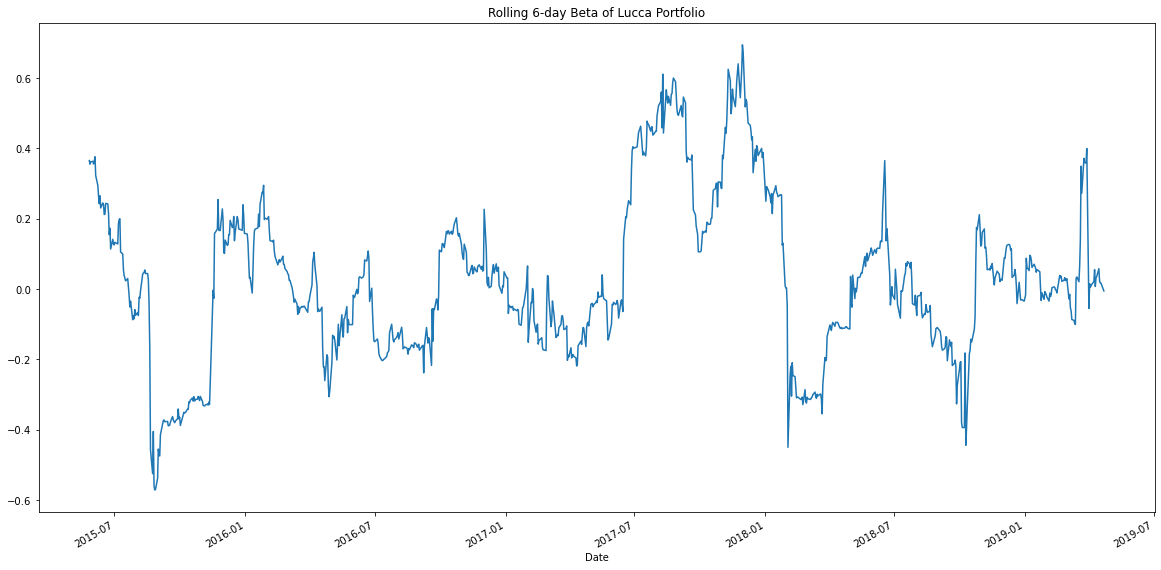

In [75]:
# Calculate and plot Beta
rolling_covariance_lucca = combined_2["Lucca's Portfolio"].rolling(window=60).cov(combined_2["S&P Returns"])
rolling_covariance_sep2 = combined_2["S&P Returns"].rolling(window=60).var()
rolling_beta_2 = rolling_covariance_lucca / rolling_covariance_sep2
rolling_beta_2.plot(figsize=(20,10), title='Rolling 6-day Beta of Lucca Portfolio')



### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [77]:
# Calculate Annualzied Sharpe Ratios
sharpe_2 = (combined_2.mean()*252) / (combined_2.std()*np.sqrt(252))
sharpe_2.sort_values(ascending=False)
        

Algo 1                         1.369589
Lucca's Portfolio              0.932884
BERKSHIRE HATHAWAY INC         0.606743
Algo 2                         0.484334
SOROS FUND MANAGEMENT LLC      0.342894
TIGER GLOBAL MANAGEMENT LLC   -0.130186
PAULSON & CO.INC.             -0.491422
S&P Returns                   -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

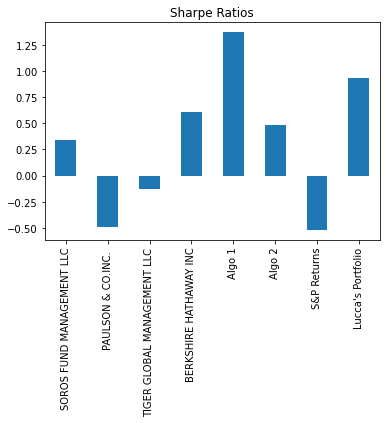

In [78]:
# Visualize the sharpe ratios as a bar plot
sharpe_2.plot.bar(title='Sharpe Ratios')

### How does your portfolio do?

* my portfolio had in equal parts: Apple, Google and Costco since from Jan 2015 until December 2020. my portfolio had an excellent return, only losing for Algo 1 (when comparing Sharpe Ratios)